# Tutorial Week 11 questions

## Question 1

### We have a data matrix $X$ that is $n\times p$. The $(i,j)$th element is written $x_{ij}$.  We assume that the features are centred so that the sample mean of each column is zero.  The $i$th row of $X$ is $x_i$ and the $m$th column is denoted $x_{.m}$.  

### In lectures we stated that the best $M$-dimensional reconstruction of the data (when features are centred) has $x_i\approx \sum_{m=1}^M z_{im}\phi_m$, where $z_{.m}=(z_{1m},\dots, z_{nm})^\top$ are the principal component scores for principal component $m$ and $\phi_m$ is the loading vector, which is the eigenvector for the $m$th largest eigenvalue of $S=n^{-1}\sum_{i=1}^n x_ix_i^\top$, $m=1,\dots, M$. Since the features are centred, $S$ is the sample covariance, with a denominator of $n$.  

### Suppose that the $z_{im}$ are known, $i=1,\dots, n$, $m=1,\dots, M$, but we don't know the eigenvectors $\phi_m$.  Show that for any $m=1,\dots, M$ and $j=1,\dots, p$, we can obtain $\phi_{mj}$ as the coefficient estimate from a least squares regression of the response vector $x_{.j}$ on $z_{.m}$.  

## Question 2

### In lectures we derived the principal components score vectors as the eigenvectors of a sample covariance matrix.  However, principal components are often computed using the singular value decomposition (SVD) of a data matrix $X$.  Suppose $X$ is $n\times p$.  The singular value decomposition of $X$ is $X=UDV^\top$, where $U$ is $n\times p$, $V$ is $p\times p$, $D$ is diagonal with diagonal elements $d_{11}\geq \dots \geq d_{pp}\geq 0$, and $U^\top U=I_p$, $V^\top V=I_p$, where $I_p$ denotes the $p\times p$ identity matrix.  

### Show that the eigenvalues of $S$ are $d_{jj}^2/n$, $j=1,\dots, p$, and its eigenvectors are the columns of $V$.  Hence we can compute the principal components using the SVD.  

## Question 3

In this question we consider an example from the scikit learn, the Olivetti faces dataset. The code below is a small part of a notebook that you can download from

https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

From the documentation:

"This example applies to olivetti_faces_dataset different unsupervised matrix decomposition (dimension reduction) methods from the module :mod:sklearn.decomposition (see the documentation chapter decompositions).

Authors: Vlad Niculae, Alexandre Gramfort License: BSD 3 clause"

We will only consider a decomposition based on PCA. In this question, first run the code below, observe the output and see if you can understand what is going on.

Dataset preparation

Loading and preprocessing the Olivetti faces dataset.

In [16]:
import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


Define a base function to plot the gallery of faces.

In [25]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

Let's take a look at our data. Gray color indicates negative values, white indicates positive values.

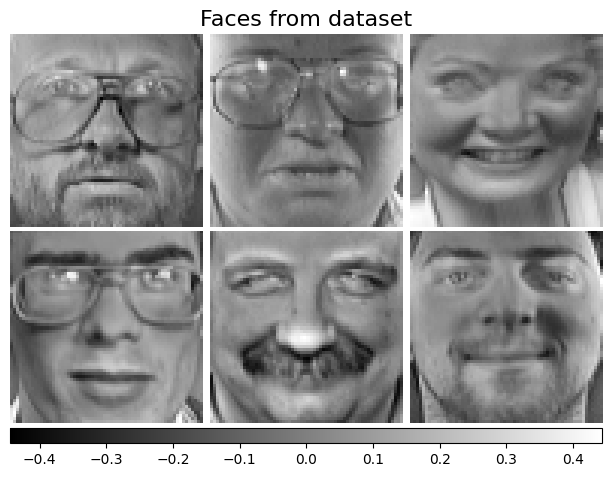

In [26]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

Initialise different estimators for decomposition and fit each of them on all images and plot some results. Each estimator extracts 6 components as vectors . We just displayed these vectors in human-friendly visualisation as 64x64 pixel images.

Eigenfaces - PCA using randomized SVD

Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space.

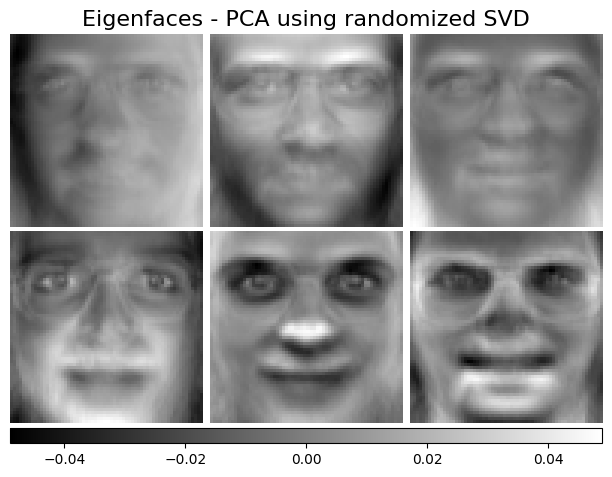

In [7]:
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(faces_centered)
plot_gallery(
    "Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components]
)

After you have understood the code, repeat the analysis with a larger number of components (within your computational constraints).  Are the additional principal components more or less interpretable?    